In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline

Read Dataset

In [21]:
df = pd.read_csv("../data/raw/dataset.csv")

In [22]:
df.head()

,Temperature,Oxygen,Humidity,Prediction
0,26.952540,14.486084,83.036662,0
1,33.607575,5.161019,52.847559,0
2,29.110535,12.613219,57.084039,0
3,26.795327,16.340326,32.546853,0
4,21.946192,5.703607,64.453872,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Oxygen       1000 non-null   float64
 2   Humidity     1000 non-null   float64
 3   Prediction   1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [24]:
df.describe()

,Temperature,Oxygen,Humidity,Prediction
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.836861,13.181600,55.490333,0.086000
std,11.629770,4.785725,25.819993,0.280504
min,5.021839,5.005878,10.006633,0.000000
25%,14.904538,9.083429,34.432017,0.000000
50%,24.252903,13.311799,55.054652,0.000000
75%,34.490413,17.449571,78.110416,0.000000
max,44.992343,20.976425,99.996762,1.000000


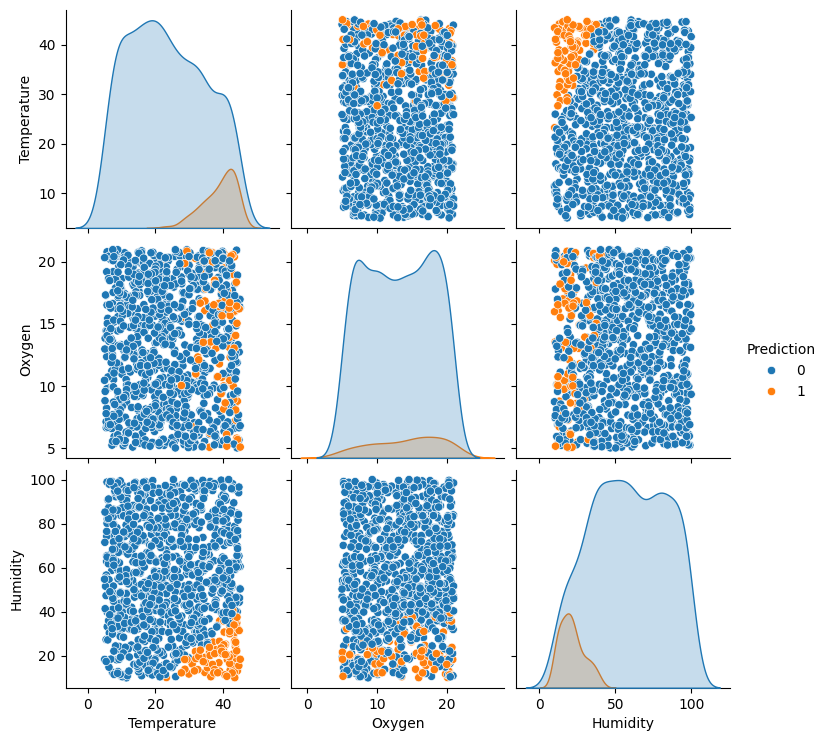

In [25]:
sns.pairplot(data=df, hue= "Prediction")

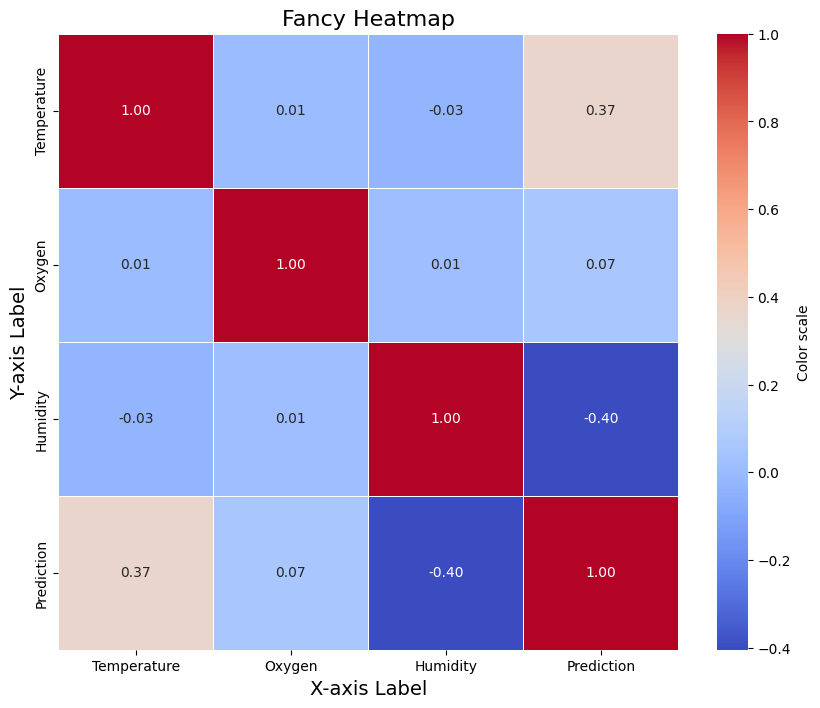

In [26]:
cmap = "coolwarm"
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Color scale'})

# Customize labels and title
plt.title("Fancy Heatmap", fontsize=16)
plt.xlabel("X-axis Label", fontsize=14)
plt.ylabel("Y-axis Label", fontsize=14)

# Display the plot
plt.show()

Machine Learning

In [10]:
df.columns

Index(['Temperature', 'Oxygen', 'Humidity', 'Prediction'], dtype='object')

In [28]:
features = ['Temperature', 'Oxygen', 'Humidity']
target = 'Prediction'

In [29]:
# Separate features (X) and target variable (y)
X = df.drop(target, axis=1)  # drop target_column
y = df[target]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the target variable on the validation set
y_val_pred = logreg_model.predict(X_val)

In [30]:
# Get predicted probabilities
y_val_proba = logreg_model.predict_proba(X_val)[:, 1] # to extract the predicted probabilities of the positive class for each sample.

Model Evaluation

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
classification_report_str = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00        13

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Save Model

In [33]:
import pickle

# Save the model to a file using pickle
with open('../artifacts/model/logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

Scoring

In [35]:
# Load the model from the file using pickle
with open('../artifacts/model/logreg_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [38]:
# test a list of feature values
new_data_point = [40, 45, 20]

# Convert the list to a NumPy array and reshape it to match the expected input format
new_data_point_array = np.array(new_data_point).reshape(1, -1)
# Make predictions
predicted_label = loaded_model.predict(new_data_point_array)
predicted_proba = loaded_model.predict_proba(new_data_point_array)[:, 1]

/workspaces/ML_Model_Monitoring/monitor-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/workspaces/ML_Model_Monitoring/monitor-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(array([1]), array([1.]))

In [39]:
print("-------------" * 5)
print(f"Predicted Label: {predicted_label[0]}")
print("-------------" * 5)
print(f"Predicted Probability of Positive Class: {predicted_proba[0]:.4f}")
print("-------------" * 5)

-----------------------------------------------------------------
Predicted Label: 1
-----------------------------------------------------------------
Predicted Probability of Positive Class: 1.0000
-----------------------------------------------------------------
